<a href="https://colab.research.google.com/github/zacwhitney/ZacWhitneyHW6/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#You have to make sure that you were able to write the file to a csv while your were working in R
house=pd.read_csv('/content/drive/MyDrive/DATA/house_prices.csv')
house.head()

,Unnamed: 0,date,state,unemploy_perc,house_price_index,house_price_perc
0,1,1976-01-01,Alabama,6.7,37.138285,0.040405
1,2,1976-02-01,Alabama,6.7,37.756437,0.051806
2,3,1976-03-01,Alabama,6.6,38.276319,0.059302
3,4,1976-04-01,Alabama,6.5,38.596135,0.059585
4,5,1976-05-01,Alabama,6.4,38.740517,0.055723


a) For the states below, please select the rows from the house dataframe, and consider converting the date column to date data type as it may be coming in string format. Then use the head function to preview your new dataframe.

In [ ]:
states = ['Michigan', 'California', 'Texas', 'Indiana']
house = house.loc[house['state'].isin(states)]
house['date'] = pd.to_datetime(house['date'])
house.head()

b) Use the FacetGrid from seaborn to create line plots to represent house_price_index for each state. Please make the line color red, set ticks on x axis for years ['1980', '2000', '2020'], which you may have to convert date type again, put those years as labels, and set the titles for each small plot to their state names. In addition, set the y label to 'house price index' and remove the x label since it's obvious that these are years.

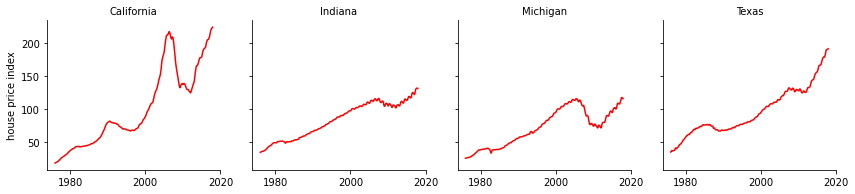

In [ ]:
graph = sns.FacetGrid(house, col="state")
graph.map(sns.lineplot, "date", "house_price_index", color = "red")
graph.set_axis_labels("", "house price index")
graph.set_titles(col_template="{col_name}")
graph.set(xticks=pd.to_datetime(("1980-01-01", "2000-01-01", "2020-01-01")))
graph.set_xticklabels(labels = ("1980", "2000", "2020"))

c) Draw a lineplot for 'house price perc', but color them based on the 'state' name which will have four lines in a single plot. Set a legend which will be at the bottom of your graph and have them horizantally positioned next to eachother. Again, set the y label to house_price_perc and remove the x label since it's obvious. (Note that my y label is still showing index. Please ignore that.)

/usr/local/lib/python3.7/dist-packages/seaborn/utils.py:413: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  new_legend = legend_func(handles, labels, loc=loc, **props)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'bottom'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


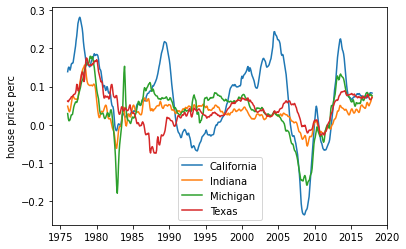

In [ ]:
graph = sns.lineplot(data=house, x='date', y='house_price_perc', hue = 'state')
sns.move_legend(graph, "bottom", ncol = 4, title=None)
graph.set(xlabel = '', ylabel ='house price perc')

##Q4
Please work on your 4th question below. Please feel free to add new code cells.

In [3]:
#Your code goes here.
world_cup = pd.read_csv('/content/drive/MyDrive/DATA/WorldCupMatches.csv')
world_cup.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [75]:
#your code goes here. Just leaving an example output of an intermediate step for you to check the last two columns
weights = world_cup.groupby(['Home Team Initials', 'Away Team Initials']).count().reset_index()
HomeGoalTotal = weights.groupby(['Home Team Initials'])['Home Team Goals'].sum()
team_pair = weights.join(HomeGoalTotal, on='Home Team Initials', lsuffix='Initials')
team_pair = team_pair.loc[:,['Home Team Initials', 'Away Team Initials', 'Year', 'Home Team Goals']]
team_pair.rename(columns = {'Year':'Weights'}, inplace = True)
team_pair.head() 

,Home Team Initials,Away Team Initials,Weights,Home Team Goals
0,ALG,AUT,1,6
1,ALG,CHI,1,6
2,ALG,ESP,1,6
3,ALG,NIR,1,6
4,ALG,RUS,1,6


Make sure that you only write four columns ('Home Team Initials', 'Away Team Initials', 'weight', 'HomeGoalTotal') from the data frame, team_pairs, to a csv file

In [84]:
team_pair.to_csv('team_pair.csv')